In [1]:
import sys
from pathlib import Path

# Add src directory to Python path
src_path = "../src"
sys.path.insert(0, str(src_path))

In [2]:
import logging

logging.getLogger(__name__).addHandler(logging.NullHandler())

# Activate debugging
# logging.basicConfig(level=logging.DEBUG)
# Silence traces from other modules except my library
logging.getLogger("faex").setLevel(logging.DEBUG)


In [3]:

import numpy as np
import pandas as pd
from faex.mathing.RandomGenerator import RandomGenerator

# Set pandas print options for better readability, wider column and not breaking lines
pd.set_option('display.precision', 2)
pd.set_option('display.width', 100)
pd.set_option('display.max_columns', None)

# Set numpy print options for better readability
np.set_printoptions(precision=2, suppress=True)
np.set_printoptions(threshold=10_000)

rng = RandomGenerator(42)

N = 8
df = pd.DataFrame({
    "x1": np.linspace(0,10, N),
    "x2": rng.gauss(0, 1, N),
    "x3": np.linspace(0,10, N) + rng.gauss(0, 1, N),
    "target": np.linspace(0, 1, N)
})

df_X, df_y = df[["x1", "x2", "x3"]], df["target"]

print(f"Data: {df_X}")


class MockModel:
    def predict(self, df: pd.DataFrame) -> np.ndarray:
        return df["x1"] + df["x3"]

model = MockModel()

print(f"Predictions: {model.predict(df_X)}")


Data:       x1    x2    x3
0   0.00 -0.14 -0.22
1   1.43 -0.17  1.54
2   2.86 -0.11  3.09
3   4.29  0.70  5.45
4   5.71 -0.13  6.37
5   7.14 -1.50  7.25
6   8.57  0.33  7.83
7  10.00 -0.27  8.99
Predictions: 0    -0.22
1     2.97
2     5.95
3     9.73
4    12.09
5    14.40
6    16.40
7    18.99
dtype: float64


In [4]:
# import seaborn as sns

# sns.pairplot(df)

In [5]:
from faex.explaining.ExplainerCore import ExplainerCore
from faex.explaining.DataCore import DataCore
from faex.explaining.ExplainerConfiguration import ExplainerConfiguration
from faex.explaining.explainers.ICE import ICE

core = ExplainerCore(
    dataframe_X=df_X,
    model=model
)

conf1 = ExplainerConfiguration(
    datacore=core.datacore(),
    study_features=["x1"],
    bins=15,
    strict_limits=False,
)

core.add_configuration("conf1", conf1)


ICE Predictions: HyperPlanes(grid=Grid(grid=[array([-0.33,  0.43,  1.19,  1.95,  2.71,  3.48,  4.24,  5.  ,  5.76,
        6.52,  7.29,  8.05,  8.81,  9.57, 10.33])]), targets=array([[-0.55,  0.21,  0.97,  1.74,  2.5 ,  3.26,  4.02,  4.78,  5.54,
         6.31,  7.07,  7.83,  8.59,  9.35, 10.12],
       [ 1.21,  1.97,  2.73,  3.5 ,  4.26,  5.02,  5.78,  6.54,  7.31,
         8.07,  8.83,  9.59, 10.35, 11.12, 11.88],
       [ 2.76,  3.52,  4.28,  5.04,  5.8 ,  6.57,  7.33,  8.09,  8.85,
         9.61, 10.38, 11.14, 11.9 , 12.66, 13.42],
       [ 5.12,  5.88,  6.64,  7.4 ,  8.16,  8.93,  9.69, 10.45, 11.21,
        11.97, 12.73, 13.5 , 14.26, 15.02, 15.78],
       [ 6.04,  6.8 ,  7.56,  8.32,  9.09,  9.85, 10.61, 11.37, 12.13,
        12.89, 13.66, 14.42, 15.18, 15.94, 16.7 ],
       [ 6.92,  7.68,  8.44,  9.21,  9.97, 10.73, 11.49, 12.25, 13.02,
        13.78, 14.54, 15.3 , 16.06, 16.82, 17.59],
       [ 7.5 ,  8.26,  9.02,  9.79, 10.55, 11.31, 12.07, 12.83, 13.6 ,
        14.36, 15.12,

/tmp/ipykernel_7502/815580368.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


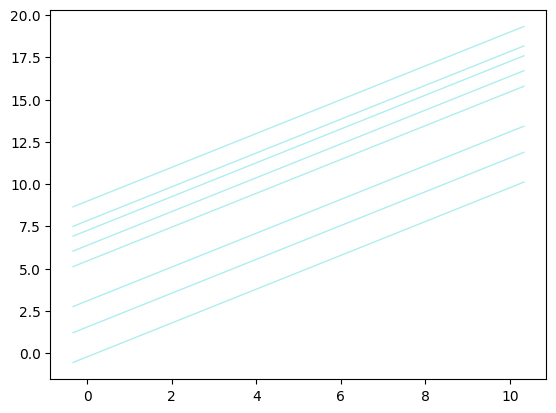

In [6]:

ice = core.explain(technique="ice", configuration="conf1")

print(f"ICE Predictions: {ice}")

dataplotter = core.plot(technique="ice", configuration="conf1", params={"alpha":1.0})

print(type(dataplotter))
print(dataplotter)
fig, ax = dataplotter.matplotlib_plot()
fig.show()


<class 'faex.data.DataPlotter.DP_Scatter'>


/tmp/ipykernel_7502/1236315103.py:7: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


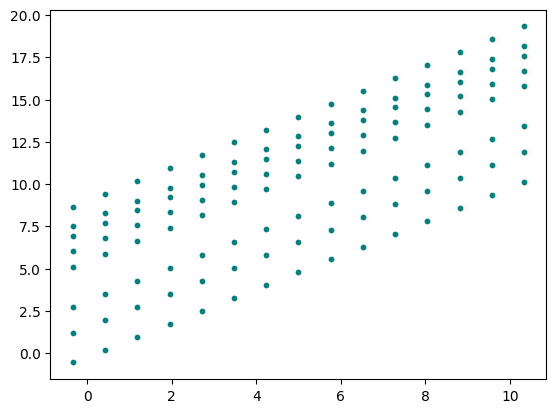

In [7]:
dataplotter = core.plot(technique="icescatter", configuration="conf1", params={"alpha":1.0})

print(type(dataplotter))
print(dataplotter)

fig, ax = dataplotter.matplotlib_plot()
fig.show()


PDP Predictions: HyperPlane(grid=Grid(grid=[array([-0.33,  0.43,  1.19,  1.95,  2.71,  3.48,  4.24,  5.  ,  5.76,
        6.52,  7.29,  8.05,  8.81,  9.57, 10.33])]), target=array([ 4.71,  5.47,  6.23,  6.99,  7.75,  8.51,  9.28, 10.04, 10.8 ,
       11.56, 12.32, 13.09, 13.85, 14.61, 15.37]))


/tmp/ipykernel_7502/2127258806.py:7: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


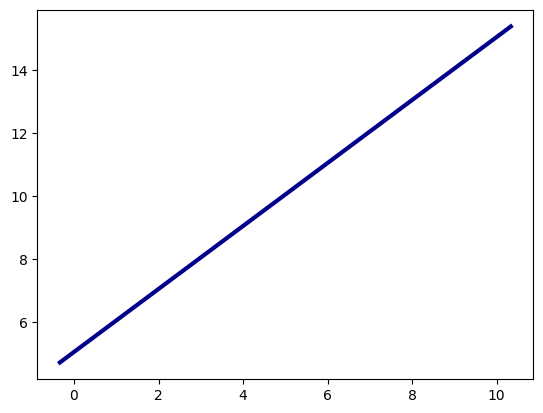

In [8]:
pdp = core.explain(technique="pdp", configuration="conf1")

print(f"PDP Predictions: {pdp}")

dataplotter = core.plot(technique="pdp", configuration="conf1")
fig, ax = dataplotter.matplotlib_plot()
fig.show()


/tmp/ipykernel_7502/2317925495.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


M-ICE Predictions: <faex.data.DataHolder.DataHolderCollection object at 0x78984057d160>
HyperPlanes(grid=[array([-0.33,  0.43,  1.19,  1.95,  2.71])], targets=array([[-0.55,  0.21,  0.97,  1.74,  2.5 ],
       [ 1.21,  1.97,  2.73,  3.5 ,  4.26],
       [ 2.76,  3.52,  4.28,  5.04,  5.8 ]]))
HyperPlanes(grid=[array([3.48, 4.24, 5.  , 5.76, 6.52])], targets=array([[ 8.93,  9.69, 10.45, 11.21, 11.97],
       [ 9.85, 10.61, 11.37, 12.13, 12.89]]))
HyperPlanes(grid=[array([7.29, 8.05, 8.81, 9.57])], targets=array([[14.54, 15.3 , 16.06, 16.82],
       [15.12, 15.88, 16.64, 17.4 ],
       [16.27, 17.03, 17.79, 18.56]]))
HyperPlanes(grid=[array([10.33])], targets=array([], dtype=float64))


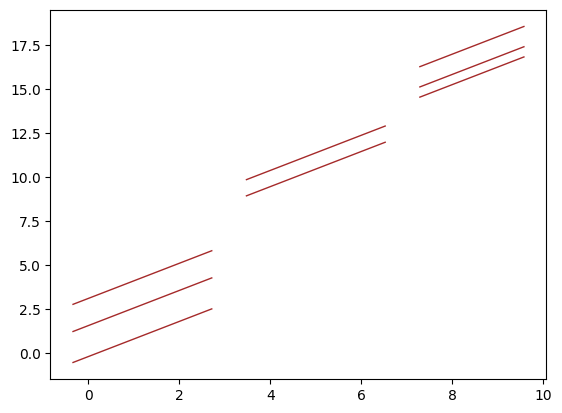

In [9]:
mice = core.explain(technique="m-ice", configuration="conf1")

print(f"M-ICE Predictions: {mice}")
for x in mice:
    print(x)

dataplotter = core.plot(technique="m-ice", configuration="conf1", params={"alpha":1.0})

fig, ax = dataplotter.matplotlib_plot()
fig.show()


M-ICE Predictions: <faex.data.DataHolder.DataHolderCollection object at 0x7898402bc7a0>
HyperPlane(grid=[array([-0.33,  0.43,  1.19,  1.95,  2.71])], target=array([1.14, 1.9 , 2.66, 3.42, 4.19]))
HyperPlane(grid=[array([3.48, 4.24, 5.  , 5.76, 6.52])], target=array([ 9.39, 10.15, 10.91, 11.67, 12.43]))
HyperPlane(grid=[array([7.29, 8.05, 8.81, 9.57])], target=array([15.31, 16.07, 16.83, 17.6 ]))
HyperPlane(grid=[array([10.33])], target=np.float64(nan))


/home/jparisu/projects/phd/local_researching/faex/.dev/../src/faex/explaining/explainers/M_PDP.py:66: RuntimeWarning: Mean of empty slice.
  predictions = targets.mean(axis=0)
/home/jparisu/assets/py_vir_env/.default_venv/lib/python3.12/site-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/tmp/ipykernel_7502/2919600766.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


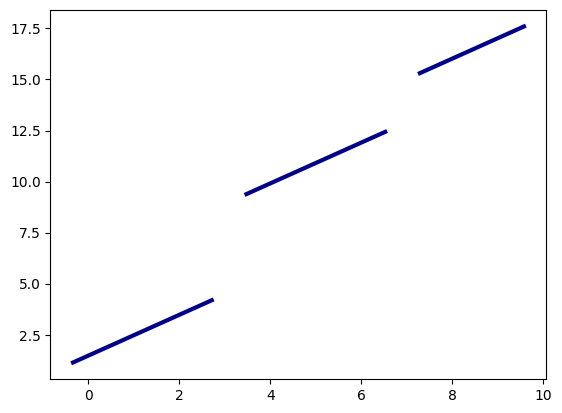

In [10]:
mpdp = core.explain(technique="m-pdp", configuration="conf1")

print(f"M-ICE Predictions: {mpdp}")
for x in mpdp:
    print(x)

dataplotter = core.plot(technique="m-pdp", configuration="conf1", params={"alpha":1.0})

fig, ax = dataplotter.matplotlib_plot()
fig.show()


/tmp/ipykernel_7502/2415570046.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


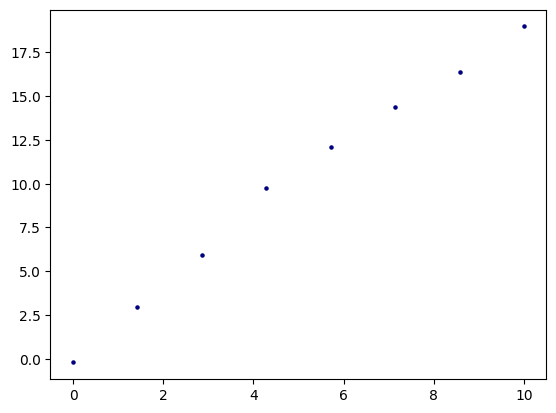

In [11]:
dataplotter = core.plot(technique="real-prediction", configuration="conf1", params={"alpha":1.0})
fig, ax = dataplotter.matplotlib_plot()
fig.show()

/tmp/ipykernel_7502/790321645.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


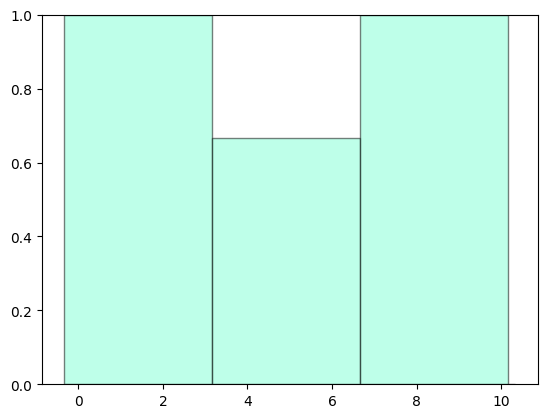

In [12]:
dataplotter = core.plot(technique="histogram", configuration="conf1", params={"edgecolor":"black"})
fig, ax = dataplotter.matplotlib_plot()
fig.show()

/tmp/ipykernel_7502/2569386506.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


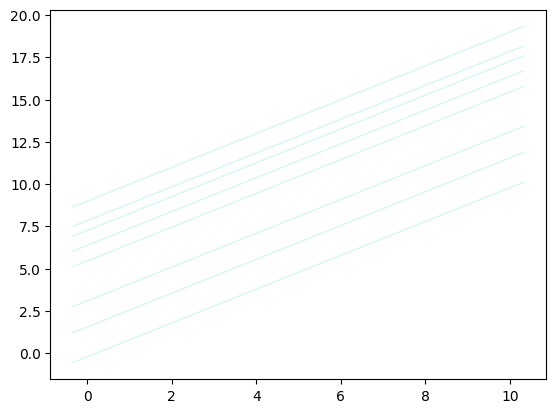

In [13]:
dataplotter = core.plot(technique="lice", configuration="conf1", params={"alpha":0.5})
fig, ax = dataplotter.matplotlib_plot()
fig.show()

/tmp/ipykernel_7502/3693865728.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


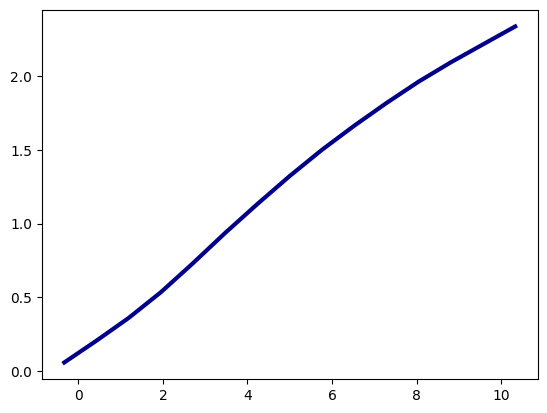

In [14]:
dataplotter = core.plot(technique="lpdp", configuration="conf1")
fig, ax = dataplotter.matplotlib_plot()
fig.show()